# Introduction

**Background**

Traffic congestion is a condition in transport that is characterised by slower speeds, longer trip times, and increased vehicular queueing. Traffic congestion on urban road networks has increased substantially, since the 1950s.

Traffic congestion has a number of negative effects:
1. Wasting time of motorists and passengers ("opportunity cost"). As a non-productive activity for most people, congestion reduces regional economic health
2. Stressed and frustrated motorists, encouraging road rage and reduced health of motorists
3. Emergencies: blocked traffic may interfere with emergency vehicles traveling to their destinations where they are urgently needed

**Objective**

This notebook aims to help better understand the US Traffic Dataset in 2015 to help with traffic management. In this notebook, analysis is focused on traffic volume. Analysis of stations and its role in traffic management are part of possible future works.

**Key Findings**

The top 5 patterns from this analysis are listed below,
1. Daily traffic volume for Mondays and Sundays follow a similar shape and are different from the rest of the week
2. Traffic volume over the week are generally similar across the states except for some such as West Virginia -- it is worthwhile to consider this for traffic management in a particular state
3. On average, Saturdays have the most traffic volume as compared to other days of the week
4. In 2015, there was no sign of an increasing trend in traffic volume, but instead periodic dips and spikes
5. Urban: Principal Arterial - Interstate accounts for the highest and lowest traffic volumes (top and bottom 10%) at 60% and 26% respectively -- suggesting that these types of roads are either heavily used or barely used

**How to use this notebook:** This notebook is broken down into 3 parts and its subsections
- Part 1: Understanding the dataframe/ dataset
- Part 2: Understanding traffic volume
- Part 3: Predicting traffic volume


**Dataset**: [US Traffic Dataset, 2015](https://www.kaggle.com/jboysen/us-traffic-2015)
- **Context**:
Traffic management is a critical concern for policymakers, and a fascinating data question. This ~2gb dataset contains daily volumes of traffic, binned by hour. Information on flow direction and sensor placement is also included.

- **Content**:
  - Two datasets are included:

  1. dottraffic2015.txt.gz
    - daily observation of traffic volume, divided into 24 hourly bins
    - station_id, location information (geographical place), traffic flow direction, and type of road

  2. dottrafficstations_2015.txt.gz
    - deeper location and historical data on individual observation stations, cross-referenced by station_id

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
# Change file path accoringly
traffic_path = '/content/drive/MyDrive/Colab Notebooks/ocbc hack-it/dot_traffic_2015.txt.gz'
stations_path = '/content/drive/MyDrive/Colab Notebooks/ocbc hack-it/dot_traffic_stations_2015.txt.gz'

# Read in files as dataframes
traffic_df = pd.read_csv(traffic_path, compression='gzip', header=0, sep=',', quotechar='"')
stations_df = pd.read_csv(stations_path, compression='gzip', header=0, sep=',', quotechar='"')

# Part 1: Understanding the dataframes/ dataset
1. traffic_df (dottraffic2015.txt.gz)
2. stations_df (dottrafficstations_2015)

## traffic_df

In [ ]:
# taking a look at the dataframe
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15


In [ ]:
# taking a look at the data type for each attribute, we see that date, direction_of_travel_name, functional_classification, functional_classification_name and station id are objects
# depending on what it is, we might need to conver them into an number representation to use in a model
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

In [ ]:
# Identifying missing values, there are no missing values except for restriction which is missing its value for every row
traffic_df.isnull().sum()

date                                               0
day_of_data                                        0
day_of_week                                        0
direction_of_travel                                0
direction_of_travel_name                           0
fips_state_code                                    0
functional_classification                          0
functional_classification_name                     0
lane_of_travel                                     0
month_of_data                                      0
record_type                                        0
restrictions                                 7140391
station_id                                         0
traffic_volume_counted_after_0000_to_0100          0
traffic_volume_counted_after_0100_to_0200          0
traffic_volume_counted_after_0200_to_0300          0
traffic_volume_counted_after_0300_to_0400          0
traffic_volume_counted_after_0400_to_0500          0
traffic_volume_counted_after_0500_to_0600     

In [ ]:
# Descriptive statistics to check for anomlaies 
# Here we can see that record_type and year is just the same value
traffic_df.describe()

,day_of_data,day_of_week,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,record_type,restrictions,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
count,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7140391.0,0.0,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7140391.0
mean,1.572650e+01,4.013872e+00,3.883486e+00,2.966967e+01,1.291672e+00,6.520263e+00,3.0,NaN,1.145878e+02,7.874558e+01,6.622503e+01,7.016138e+01,1.171851e+02,2.454065e+02,4.334301e+02,5.833799e+02,5.774976e+02,5.600694e+02,5.811083e+02,6.184133e+02,6.501346e+02,6.635075e+02,7.009825e+02,7.497160e+02,7.770437e+02,7.565536e+02,6.173322e+02,4.793756e+02,3.906426e+02,3.274747e+02,2.534447e+02,1.798298e+02,15.0
std,8.769343e+00,1.997511e+00,2.286816e+00,1.670612e+01,1.080419e+00,3.455234e+00,0.0,NaN,2.818492e+02,2.202875e+02,2.102642e+02,2.242483e+02,3.227085e+02,5.723301e+02,8.359078e+02,9.984941e+02,9.594217e+02,8.917308e+02,8.970572e+02,9.371717e+02,1.001836e+03,1.024515e+03,1.092236e+03,1.143318e+03,1.173933e+03,1.172116e+03,1.061545e+03,9.203711e+02,8.290271e+02,7.989146e+02,7.284074e+02,6.901713e+02,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.0,NaN,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.061000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,15.0
25%,8.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,3.0,NaN,1.300000e+01,8.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01,2.800000e+01,5.600000e+01,9.000000e+01,1.070000e+02,1.230000e+02,1.370000e+02,1.490000e+02,1.590000e+02,1.620000e+02,1.700000e+02,1.830000e+02,1.860000e+02,1.740000e+02,1.310000e+02,9.500000e+01,7.200000e+01,5.400000e+01,3.600000e+01,2.200000e+01,15.0
50%,1.600000e+01,4.000000e+00,4.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,3.0,NaN,4.200000e+01,2.700000e+01,2.100000e+01,2.300000e+01,3.800000e+01,8.600000e+01,1.700000e+02,2.640000e+02,2.850000e+02,3.030000e+02,3.320000e+02,3.620000e+02,3.860000e+02,3.910000e+02,4.090000e+02,4.380000e+02,4.520000e+02,4.320000e+02,3.370000e+02,2.520000e+02,1.980000e+02,1.550000e+02,1.090000e+02,7.000000e+01,15.0
75%,2.300000e+01,6.000000e+00,5.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,3.0,NaN,1.260000e+02,8.500000e+01,7.000000e+01,7.500000e+01,1.180000e+02,2.410000e+02,4.570000e+02,6.570000e+02,6.570000e+02,6.450000e+02,6.810000e+02,7.250000e+02,7.610000e+02,7.770000e+02,8.220000e+02,8.910000e+02,9.340000e+02,9.070000e+02,7.220000e+02,5.510000e+02,4.470000e+02,3.670000e+02,2.780000e

In [ ]:
# Check for any imbalance in the dataset for fips state code, the assumption is that different states will have different population density and different traffic volume on its roads as a result
# We see that DISTRICT OF COLUMBIA (11) is significantly less than the rest of the other states while FLORIDA (12) is significantly, more than the rest
traffic_df['fips_state_code'].value_counts(normalize=True).sort_values(ascending=False)

12    0.084913
51    0.068422
39    0.063930
13    0.049849
55    0.041801
53    0.037347
16    0.035382
36    0.034609
40    0.028395
28    0.027297
29    0.026827
6     0.026757
1     0.025726
49    0.023540
48    0.022497
32    0.022194
26    0.021861
15    0.021202
56    0.020641
19    0.020289
4     0.018685
30    0.017734
35    0.016672
41    0.016240
10    0.015653
8     0.014969
44    0.014402
20    0.013761
5     0.013147
2     0.012357
21    0.012005
42    0.011390
27    0.010367
33    0.009385
17    0.008783
24    0.008660
46    0.008243
18    0.007614
54    0.007176
47    0.006700
34    0.006694
23    0.006280
37    0.006193
45    0.006012
22    0.005907
31    0.005005
25    0.004716
38    0.004255
50    0.003925
9     0.003079
11    0.000512
Name: fips_state_code, dtype: float64

**Observations:**
1. We see that "restrictions" attribute is missing for every row in the dataset. In this case, it will not provide any value and we can drop this column. 
2. There is no missing values for any other attributes in the dataset
3. With .describe, we see that "record_type" and "year" attribute has the same value for every row, it does not add value and we can drop these columns
4. The imbalance of dataset might present an issue when developing a model to predict the traffic volume (might be skewed to oneside) yet it depends on the total aggregation? might have to develop separate model for each state -- to look into that if there is sufficinent data

- Note: Columns identified to be dropped will be dropped at a later part of this notebook

**Interpreting column unique values**

Below, we want to figure out the unique values of some object columns and how to interpret them. 
1. functional_classification_name: the class/ group of roads which the road belongs to. According to the US Federal Highway Administration, there are 3 main functional classes, which are **arterial, collector and local**. In our dataset, it is also classified into Urban and Rural.
  - **Arterial Roads**: provide the fastest method of travel and typically have low accessibility from neighboring roads. They are usually designed with long-distance travel in mind and are not as common as the other two functional classes of roads. Examples include interstates and highways
  - **Collector Roads**: second most common and are used as a connection between local roads and arterial roads. They provide a balance between access and mobility.
  - **Local Roads**:  most common roads by far, but are also the slowest for travel. They are designed specifically to have high accessibility and to connect to collector and arterial roads, and are typically not used for through traffic. The main function of local roads are to allow for people who live in low density residential to connect to other residential areas or to collector roads.

2. direction_of_travel_name: The direction of the road (NSEW)
3. fips_state_code: corresponds to the different states in USA
4. lane_of_travel: Corresponds with lane of travel in stations dataframe, where there are 3 unnique values ('Other lanes', 'Outside (rightmost) lane', 'Data with lanes combined')

In [ ]:
traffic_df['functional_classification_name'].unique()

array(['Rural: Principal Arterial - Other',
       'Urban: Principal Arterial - Interstate', 'Rural: Minor Arterial',
       'Urban: Principal Arterial - Other Freeways or Expressways',
       'Urban: Principal Arterial - Other', 'Urban: Minor Arterial',
       'Rural: Principal Arterial - Interstate', 'Rural: Major Collector',
       'Rural: Minor Collector', 'Urban: Collector',
       'Rural: Local System', 'Urban: Local System'], dtype=object)

In [ ]:
traffic_df['direction_of_travel_name'].unique()

array(['North', 'West', 'East', 'South', 'Southwest', 'Northwest',
       'East-West or Southeast-Northwest combined (ATR stations only)',
       'North-South or Northeast-Southwest combined (ATR stations only)',
       'Southeast', 'Northeast'], dtype=object)

In [ ]:
# fips state code is the different states in USA
traffic_df['fips_state_code'].unique()

array([56, 21,  6, 55,  4, 44, 19, 36, 42, 40, 16, 51, 12, 28,  1, 23, 39,
       26,  8, 15, 20, 18, 13, 48, 53, 10, 49, 29, 41, 54, 34, 38, 35, 30,
        9, 46, 32, 24, 37, 45, 22, 31,  2, 50, 17,  5, 33, 27, 25, 47, 11])

In [ ]:
# Have to refer to stations_df for refrence to lane_of_travel_name
traffic_df['lane_of_travel'].unique()

array([1, 2, 0, 3, 4, 6, 5, 7, 8, 9])

In [ ]:
# Identifying the lane of travel names from stations_df
stations_df['lane_of_travel_name'].unique()

array(['Other lanes', 'Outside (rightmost) lane',
       'Data with lanes combined'], dtype=object)

## stations_df

In [ ]:
# Taking a look at the dataframe
stations_df.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [ ]:
# Similar to above, taking a look at the data type for each attribute
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

In [ ]:
# Identifying columns with missing values, with .info(), we see that there are 28466 entries
# Columns such as shrp_site_identification with 85% of its data missing, we might not be able to impute missing values and should drop them instead
stations_df.isnull().sum().sort_values()

method_of_vehicle_classification                        0
year_of_data                                            0
station_id                                              0
record_type                                             0
posted_route_signing                                    0
number_of_lanes_monitored_for_vehicle_class             0
number_of_lanes_monitored_for_truck_weight              0
number_of_lanes_monitored_for_traffic_volume            0
number_of_lanes_in_direction_indicated                  0
national_highway_system                                 0
year_station_discontinued                               0
method_of_truck_weighing                                0
method_of_traffic_volume_counting                       0
method_of_data_retrieval                                0
lane_of_travel_name                                     0
year_station_established                                0
hpms_sample_type                                        0
direction_of_t

In [ ]:
stations_df.describe()

,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel,fips_county_code,fips_state_code,lane_of_travel,latitude,longitude,lrs_location_point,method_of_data_retrieval,method_of_traffic_volume_counting,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,year_of_data,year_station_discontinued,year_station_established
count,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28465.000000,28465.000000,19467.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.0,28466.000000,28466.000000
mean,12.804363,0.867561,3.841530,70.112731,27.532846,1.427036,38.141075,100.191299,79043.487440,1.927106,2.867877,0.955983,1.806717,2.505937,2.547214,0.589651,1.583644,1.855161,15.0,1.063233,53.212323
std,3.375080,1.371240,2.305921,87.981999,16.907782,1.219102,7.423830,77.900719,148969.365761,0.313844,0.549726,1.924756,1.458538,1.343976,1.398037,1.162620,1.607218,1.158747,0.0,9.060652,40.400920
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000
25%,13.000000,0.000000,1.000000,19.000000,12.000000,1.000000,34.053637,80.576670,2871.000000,2.000000,3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,15.0,0.000000,8.000000
50%,13.000000,0.000000,4.000000,49.000000,27.000000,1.000000,39.302861,88.209350,15305.000000,2.000000,3.000000,0.000000,3.000000,2.000000,2.000000,0.000000,2.000000,2.000000,15.0,0.000000,67.000000
75%,15.000000,2.000000,5.000000,95.000000,41.000000,2.000000,42.252370,111.937942,71200.000000,2.000000,3.000000,0.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,15.0,0.000000,94.000000
max,15.000000,9.000000,9.000000,999.000000,56.000000,9.000000,99.900010,993.387110,999999.000000,2.000000,4.000000,5.000000,4.000000,9.000000,9.000000,8.000000,9.000000,9.000000,15.0,99.000000,99.000000


**Interpreting column unique values**

Below, we want to figure out the unique values of some name object columns and how to interpret them.

In [ ]:
# Loop through all the columns that are names and print out their unique values
from pprint import pprint

for i in stations_df.columns.to_list():
  if 'name' in i:
    print('\033[1m' + i.upper() +': \033[0m')
    pprint(stations_df[i].unique().tolist())
    print('\n')

ALGORITHM_OF_VEHICLE_CLASSIFICATION_NAME: 
[nan,
 'Axle spacing with Scheme F modified',
 'Vehicle length classification',
 'Axle spacing with Scheme F',
 'Axle spacing and other input(s) not specified above',
 'Axle spacing and weight algorithm',
 'Axle spacing and vehicle length algorithm',
 'Other means not specified above',
 'Axle spacing weight and vehicle length algorithm',
 'Other axle spacing algorithm',
 'Human observation on site (manual)',
 'Automated interpretation of vehicle image or signature (e.g. video microwave '
 'sonic)',
 'Axle spacing with ASTM Standard E1572']


CALIBRATION_OF_WEIGHING_SYSTEM_NAME: 
[nan,
 'Moving average of the steering axle of 3S2s',
 'Other method',
 'Test trucks only',
 'Combination of test trucks and trucks from the traffic stream (but not ASTM '
 'E1318)',
 'ASTM Standard E1318',
 'Uncalibrated',
 'Other sample of trucks from the traffic stream',
 'Subset of ASTM Standard E1318',
 'Static calibration']


DIRECTION_OF_TRAVEL_NAME: 
['West',
 

# Part 2: Undestanding Traffic Volume
Visualise traffic volume to find key patterns
1. Daily Seasonality 
2. Weekly Seasonality
3. Day to day traffic volume
4. Days with highest and Lowest traffic volume 

In [69]:
# Create new dataframe and corresponding time period list for this analysis
avgdata_df = traffic_df[['date', 'day_of_week','traffic_volume_counted_after_0000_to_0100',
 'traffic_volume_counted_after_0100_to_0200',
 'traffic_volume_counted_after_0200_to_0300',
 'traffic_volume_counted_after_0300_to_0400',
 'traffic_volume_counted_after_0400_to_0500',
 'traffic_volume_counted_after_0500_to_0600',
 'traffic_volume_counted_after_0600_to_0700',
 'traffic_volume_counted_after_0700_to_0800',
 'traffic_volume_counted_after_0800_to_0900',
 'traffic_volume_counted_after_0900_to_1000',
 'traffic_volume_counted_after_1000_to_1100',
 'traffic_volume_counted_after_1100_to_1200',
 'traffic_volume_counted_after_1200_to_1300',
 'traffic_volume_counted_after_1300_to_1400',
 'traffic_volume_counted_after_1400_to_1500',
 'traffic_volume_counted_after_1500_to_1600',
 'traffic_volume_counted_after_1600_to_1700',
 'traffic_volume_counted_after_1700_to_1800',
 'traffic_volume_counted_after_1800_to_1900',
 'traffic_volume_counted_after_1900_to_2000',
 'traffic_volume_counted_after_2000_to_2100',
 'traffic_volume_counted_after_2100_to_2200',
 'traffic_volume_counted_after_2200_to_2300',
 'traffic_volume_counted_after_2300_to_2400']]

timeperiod = ['0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200','1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300']

In [70]:
# Column of dataframe where traffic volume attribtues start
start_index = avgdata_df.columns.get_loc("traffic_volume_counted_after_0000_to_0100")
start_index

2

## Daily Seasonality
Road traffic volume is dependent on the different hours of the day (peak hours vs off-peak hours). Hence daily seasonality can be expected and should be looked into


**Average Traffic Volume for each Time Interval in 2015 (0000 - 2300)**
1. Check the number of unique days in the dataset (365)
2. Find average volume for each time interval
3. Plot barchart to view

In [71]:
# Check the number of unique days in dataset
num_days = len(avgdata_df.date.unique())
num_days

365

In [72]:
# Loop through each column for traffic volume bins, sum everything up and divide by the number of days in the dataset (365) and append it to a list
avg_volume_timeinterval = []
for i in range(start_index,len(avgdata_df.columns)):
  avg_volume_timeinterval.append(avgdata_df.iloc[:,i].sum()/num_days)

Text(0, 0.5, 'Average Traffic Volume')

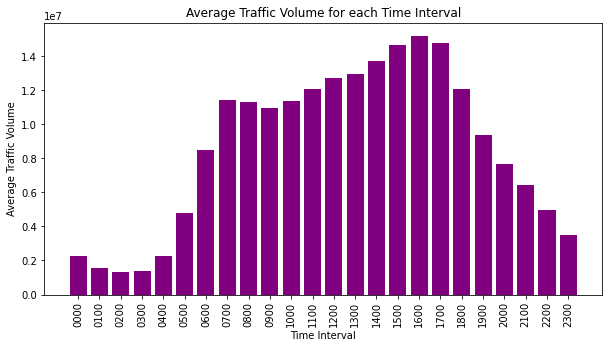

In [73]:
plt.figure(figsize=(10,5))
plt.bar(timeperiod, avg_volume_timeinterval, color='purple')
plt.xticks(rotation='vertical')
plt.title('Average Traffic Volume for each Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Average Traffic Volume')

**Average Traffic Volume for each Day of the Week**
1. Get the average traffic volume for each time interval of each day of the week
2. Plot 7 plots and compare

In [74]:
# Groupby day of the week and get the average for traffic volume for each traffic volume time interval bin
avgdata_mon = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[0,start_index-1:]
avgdata_tue = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[1,start_index-1:]
avgdata_wed = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[2,start_index-1:]
avgdata_thu = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[3,start_index-1:]
avgdata_fri = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[4,start_index-1:]
avgdata_sat = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[5,start_index-1:]
avgdata_sun = avgdata_df.groupby('day_of_week', as_index=False).mean().iloc[6,start_index-1:]

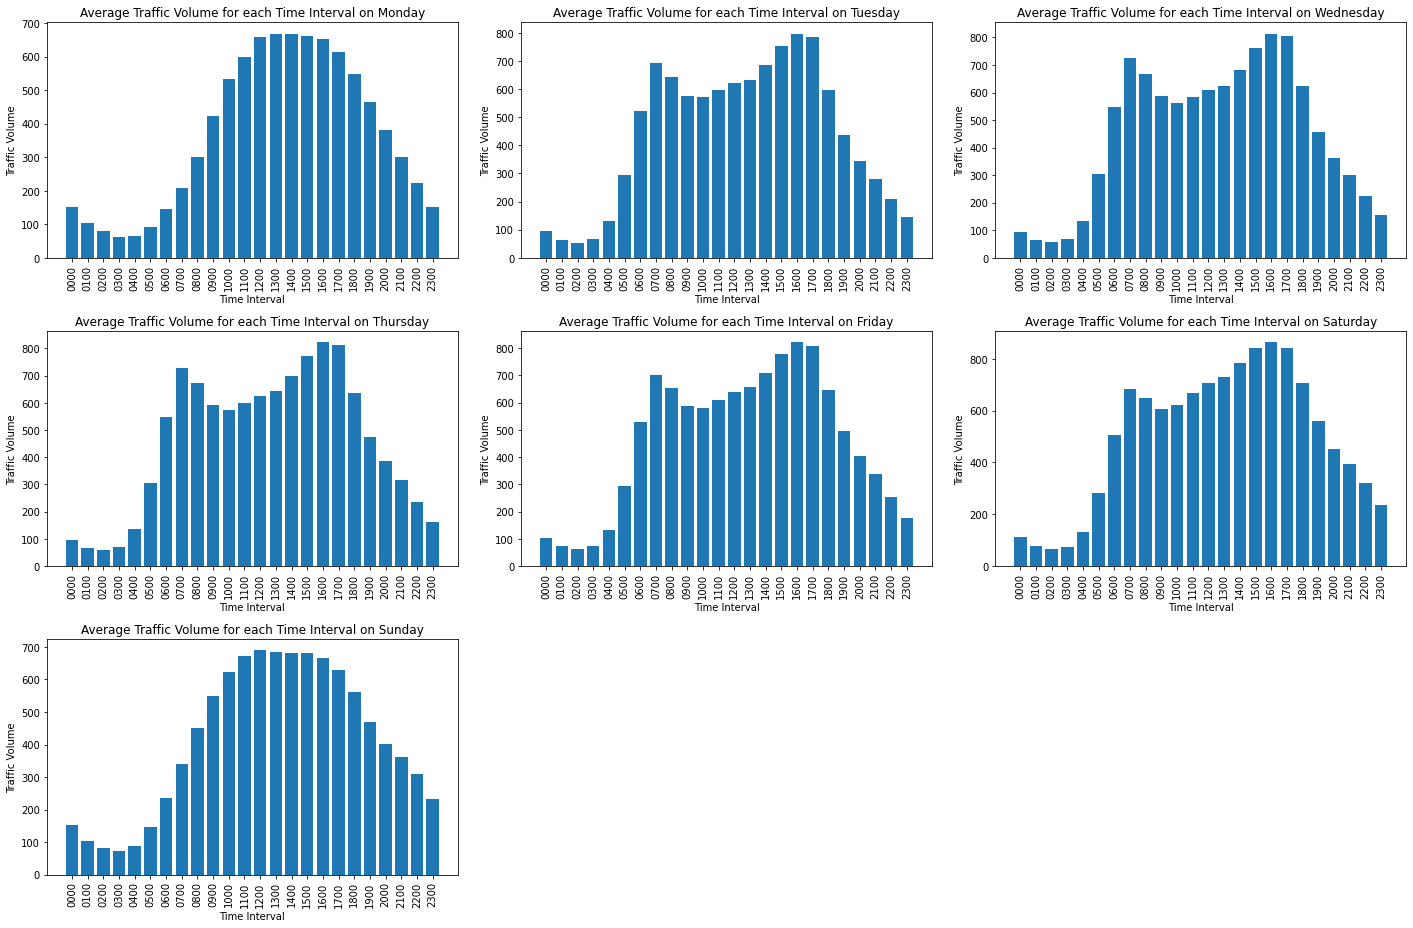

In [75]:
# Plot barcharts for each day of the week
plt.figure(figsize=(20,13))

# Define lists to help with plotting
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot_list = [avgdata_mon, avgdata_tue, avgdata_wed, avgdata_thu, avgdata_fri, avgdata_sat, avgdata_sun]

# Loop through the plot_list to plot a barchart of traffic volume for each day of the week
for i in range(0,7):
  plt.subplot(3, 3, i+1)
  plt.bar(timeperiod, plot_list[i])
  plt.xticks(rotation='vertical')
  plt.title(f'Average Traffic Volume for each Time Interval on {day_names[i]}')
  plt.xlabel('Time Interval')
  plt.ylabel('Traffic Volume')

# prevent labels from overlapping
plt.tight_layout()
plt.show(block=False)

### **Observations**

We see two different patterns for traffic volume in the days of the week. 
- Monday and Sunday share a similar shape
- Tuesday to Saturday share a similar shape

This is interesting because we would expect Saturday and Sunday to share a similar shape instead due to the difference in activities for weekdays and weekends.

**Conclusion**

1. There is daily seasonality in traffic volume as similar patterns can be observed in traffic frequency for particular time intervals.
2. We are able to identify the peak hours for weekdays, which ranges from 0700-0900 and 1500-1800.

## Weekly Seasonality
The road traffic volume on weekdays differ from weekends. Hence weekly seasonality can be expected.

In [76]:
# Get the average volume for a day of the week
avg_volume_day = []

# Lopp through the dataframe for each day of the week, group the dataframe to the particular day, sum the traffic volume and divide by number of days to get the average
for i in range(7):
  avg_volume_day.append(avgdata_df.groupby('day_of_week', as_index=False).sum().iloc[i,start_index-1:].sum()/num_days)

Text(0, 0.5, 'Average Traffic Volume')

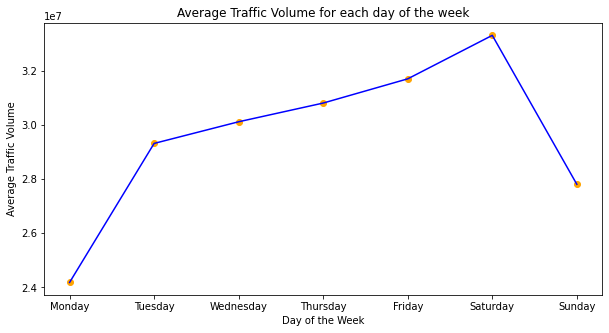

In [77]:
# Plot the linechart with variables day_names defined in the previous section, and avg_volume_day defined in the cell above
plt.figure(figsize=(10,5))
plt.plot(day_names, avg_volume_day, color='blue')
plt.scatter(day_names, avg_volume_day, c='orange')
plt.title('Average Traffic Volume for each day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')

In [82]:
# Add fips state code column to df
avgdata_df['fips_state_code'] = traffic_df['fips_state_code']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
# Create lists to store fips state code and weekly traffic volume by state for plotting
fips_code = []
weekly_vol_bystate = []

# Loop through the states available
for code in avgdata_df.fips_state_code.unique().tolist():
  fips_code.append(code)
  avg_volume_day2 = []
  # For each state, loop through the days of the week to get volume for each day
  for i in range(7):
    avg_volume_day2.append(avgdata_df[avgdata_df['fips_state_code'] == code].groupby('day_of_week', as_index=False).sum().iloc[i,start_index-1:].sum()/num_days)

  # Append to value to the weekly traffic volume by state list
  weekly_vol_bystate.append(avg_volume_day2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


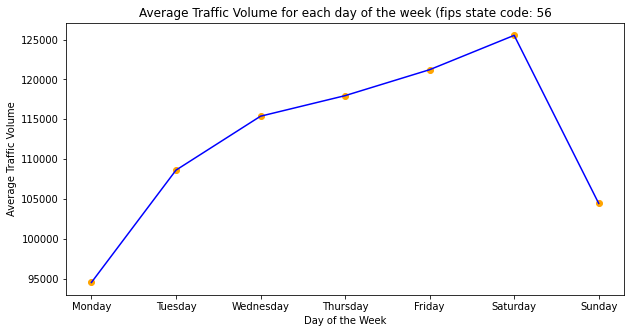

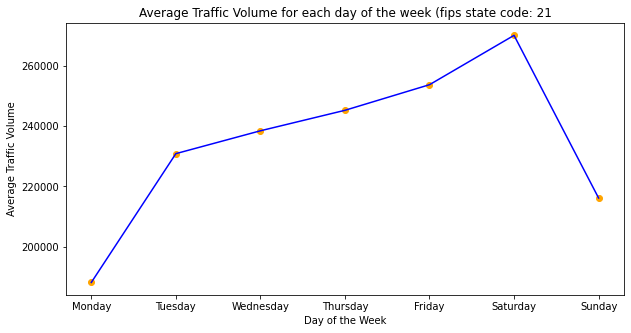

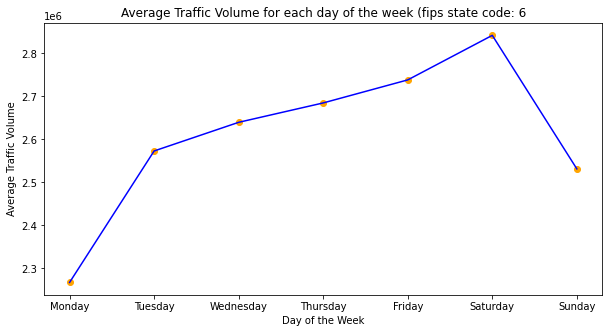

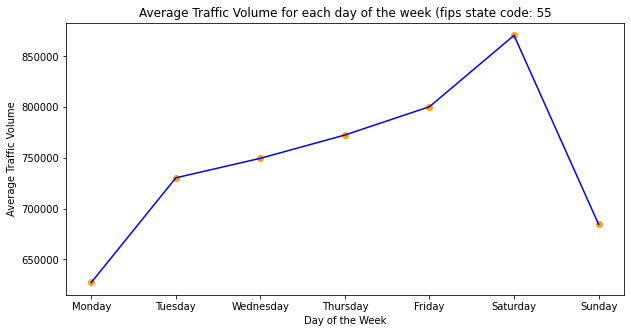

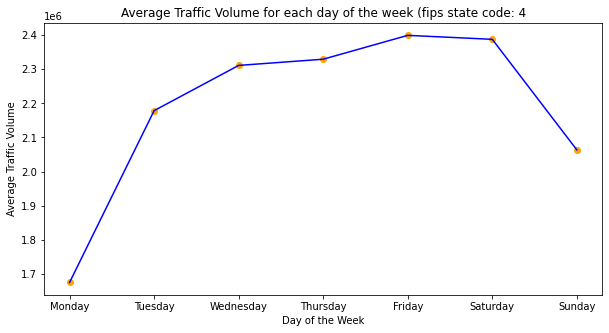

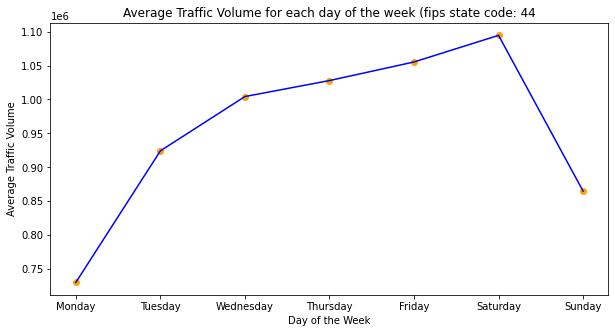

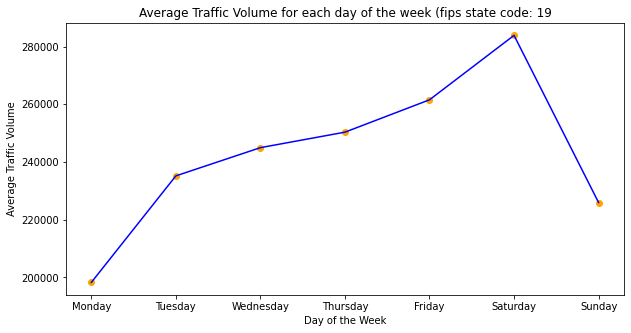

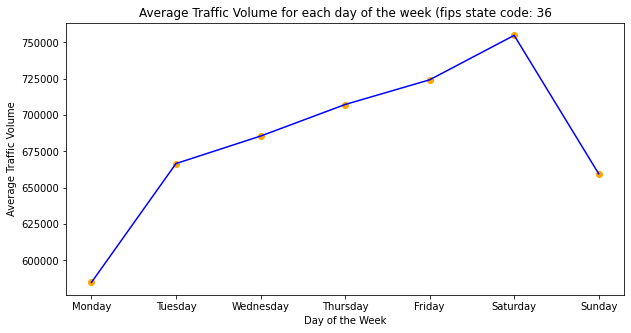

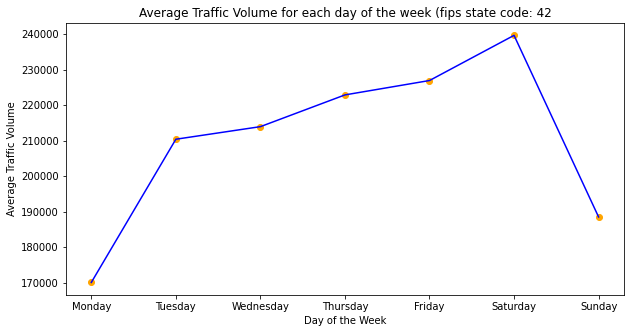

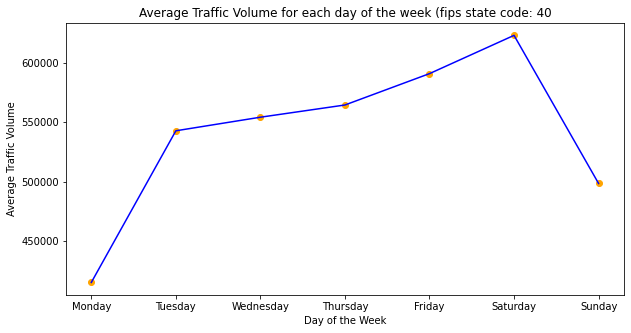

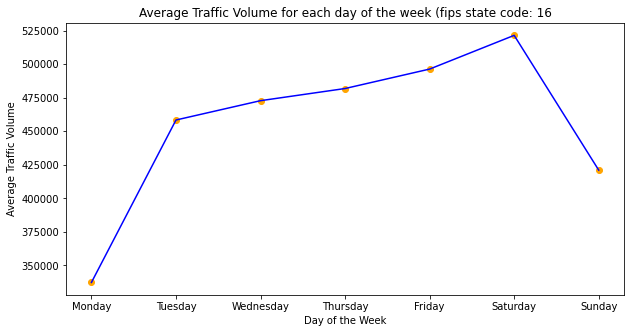

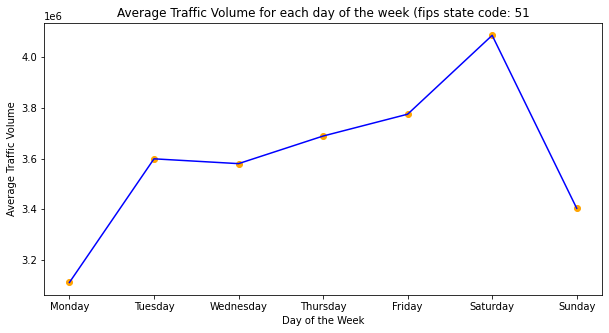

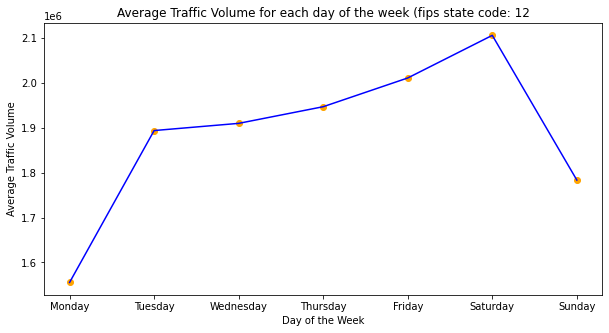

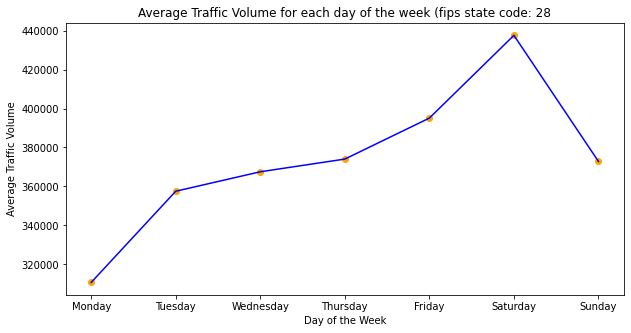

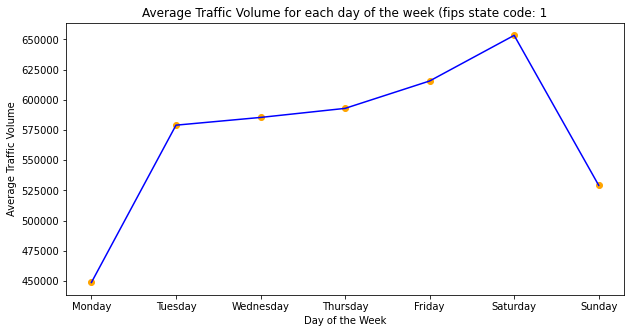

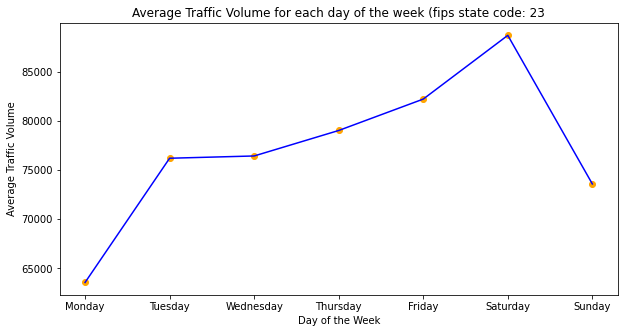

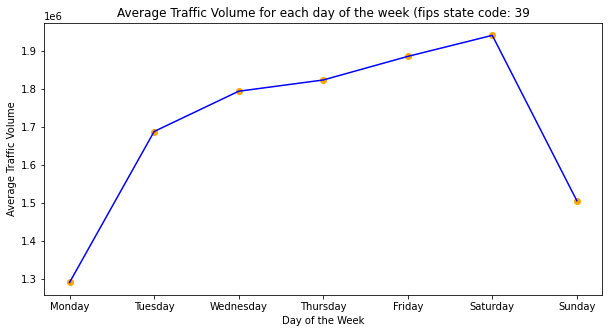

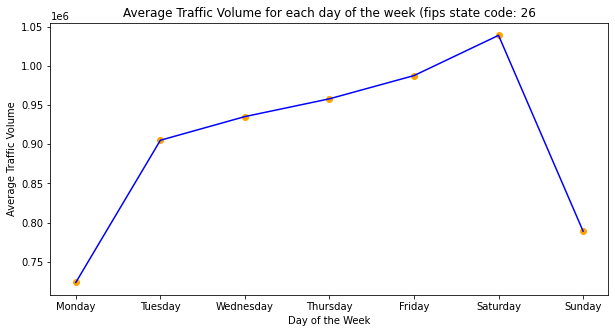

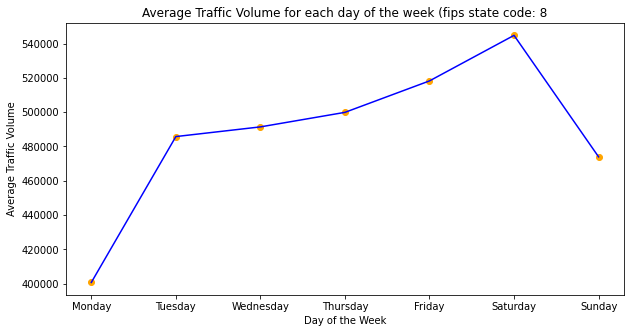

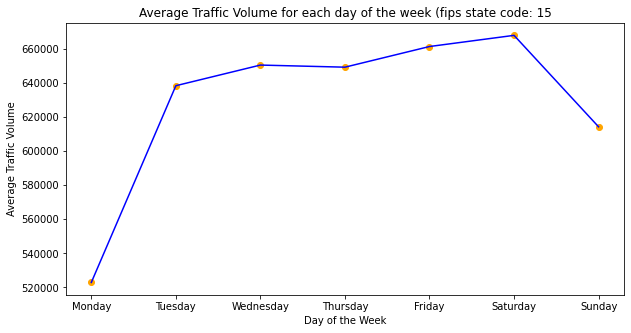

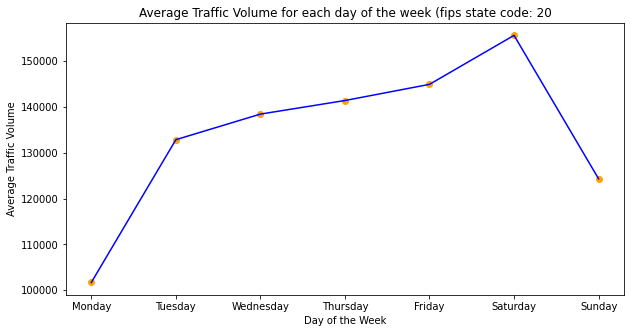

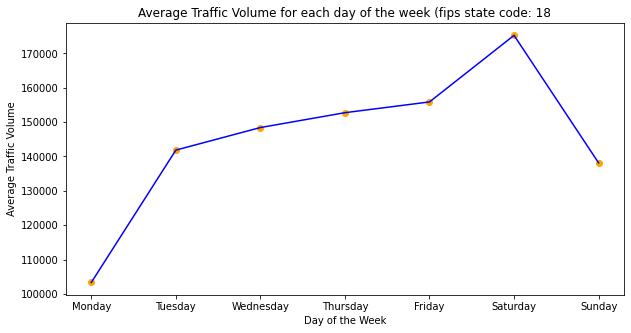

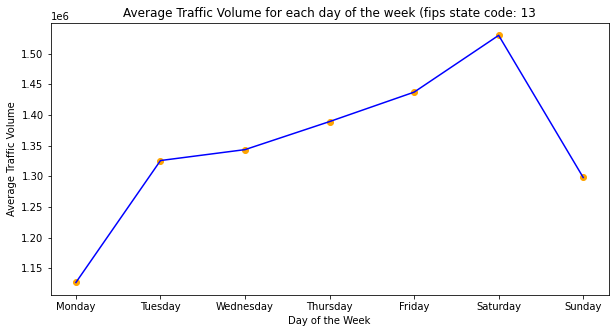

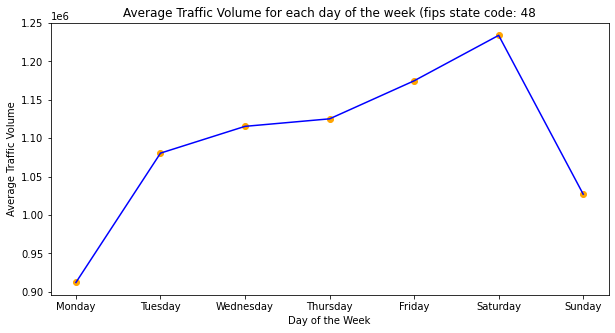

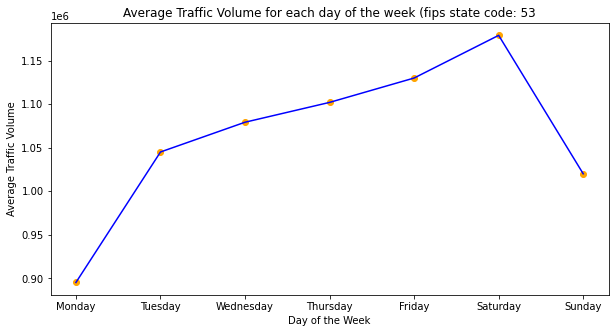

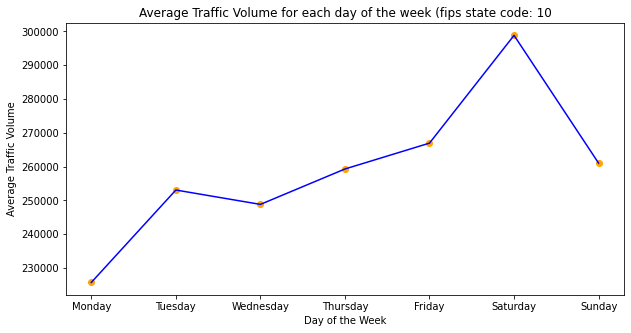

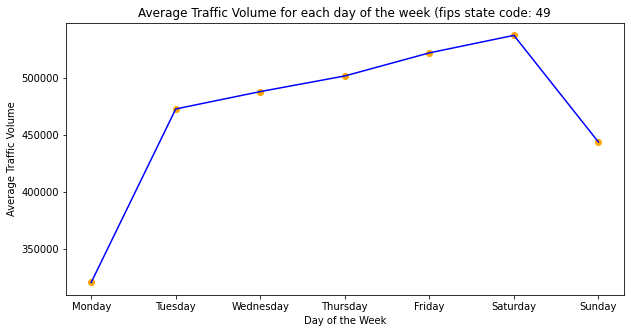

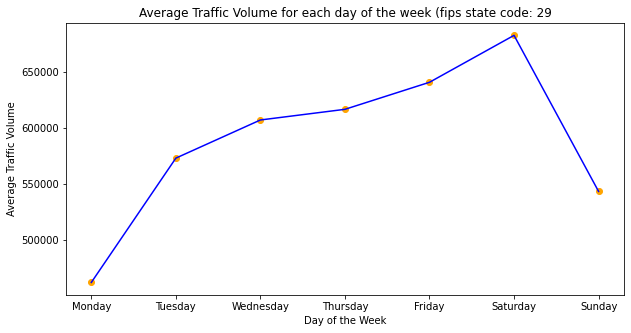

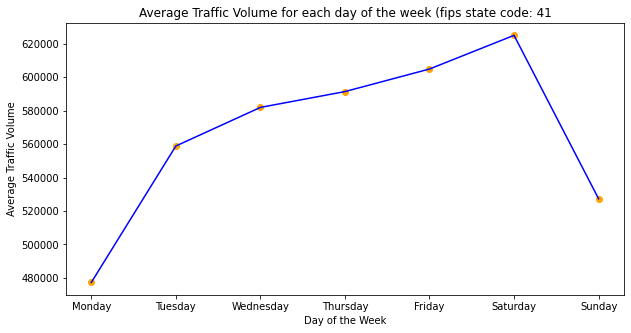

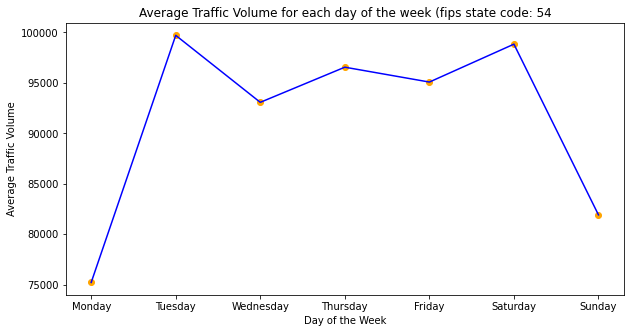

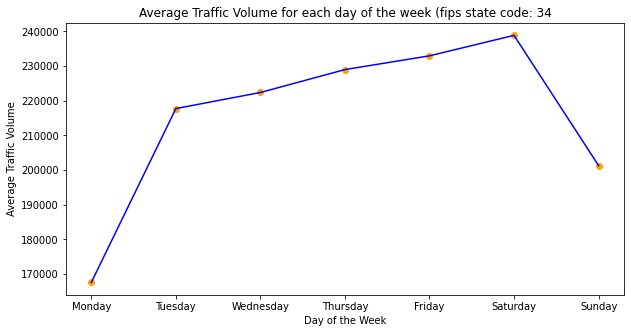

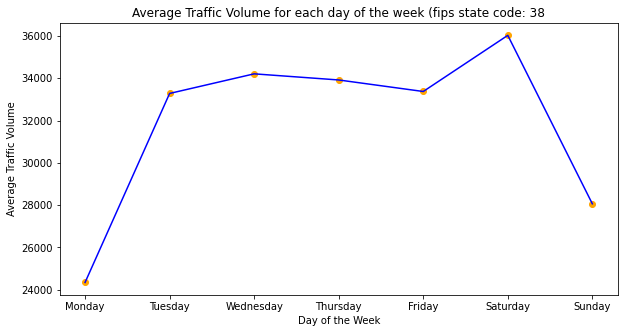

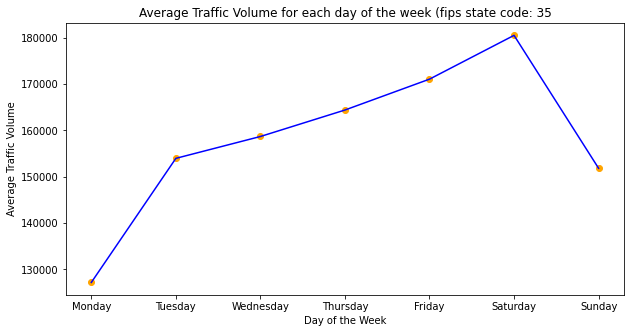

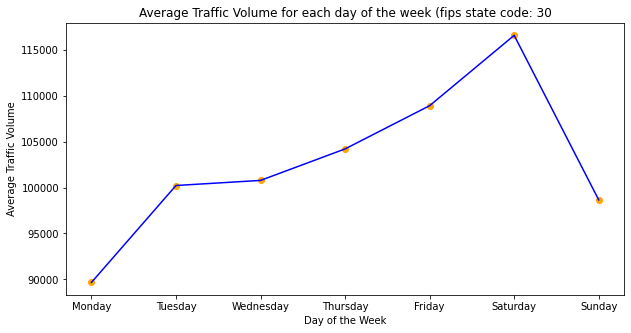

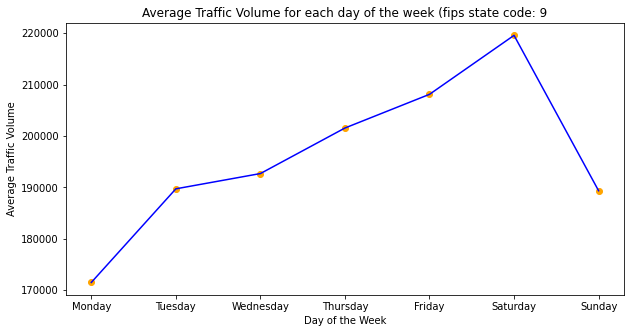

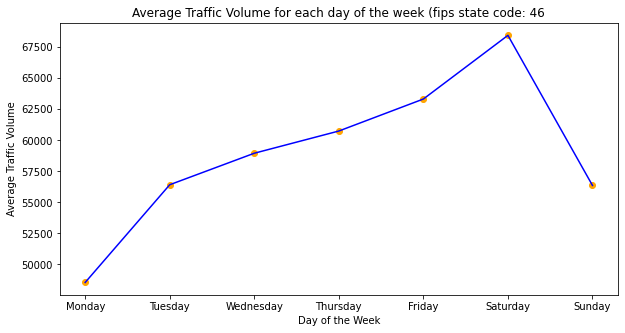

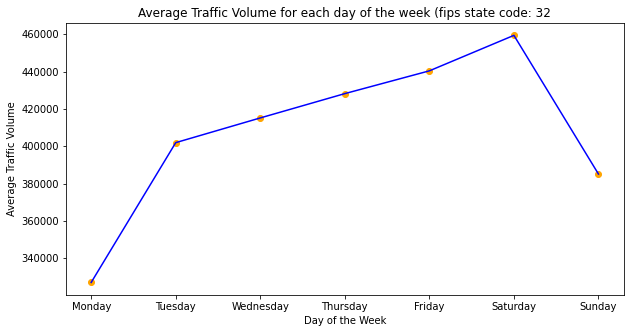

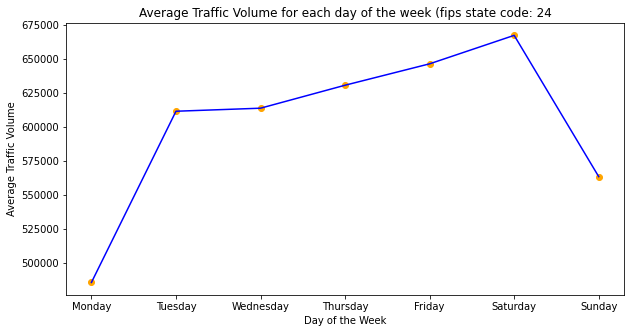

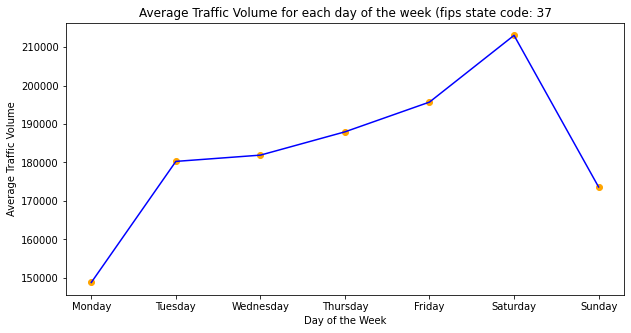

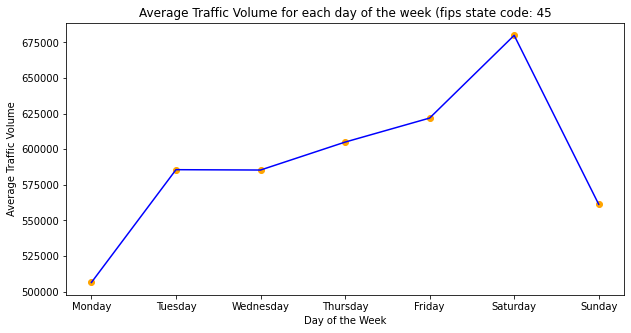

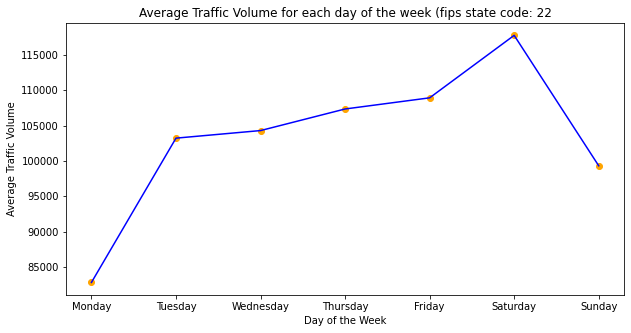

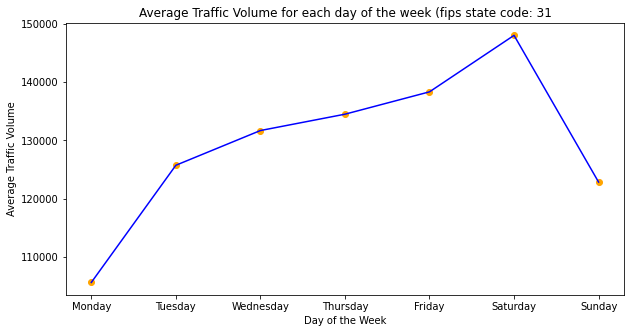

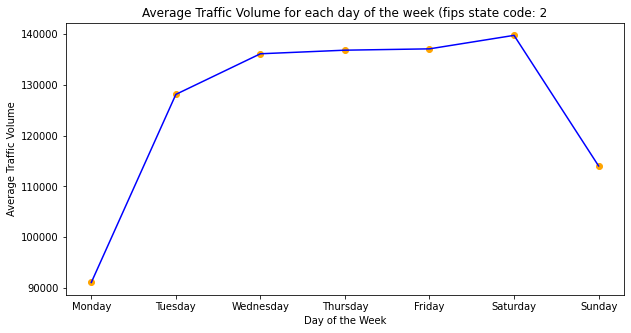

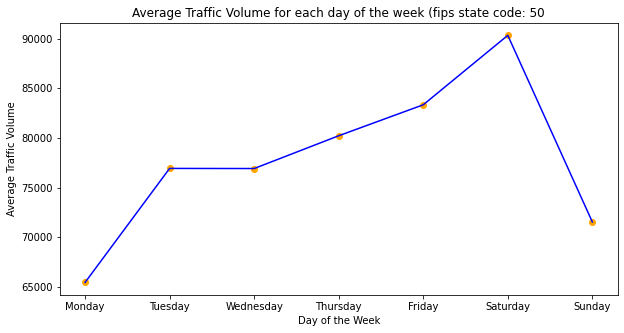

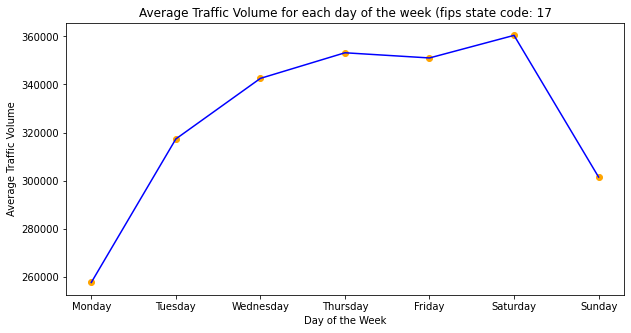

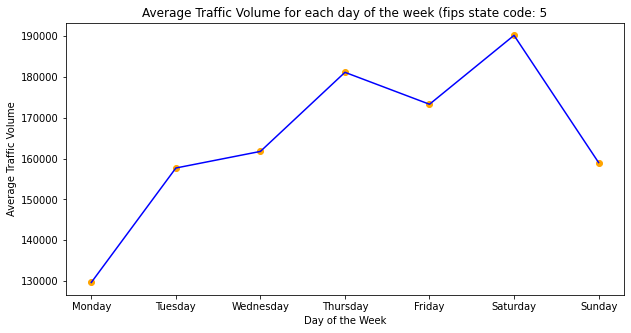

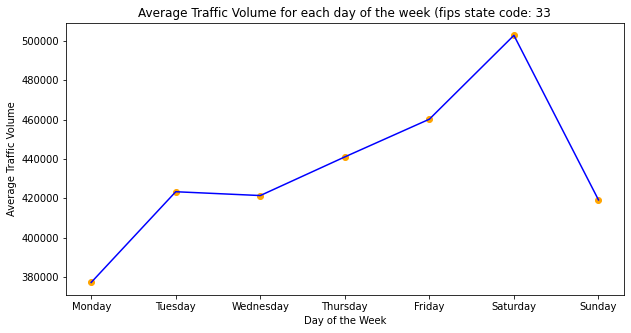

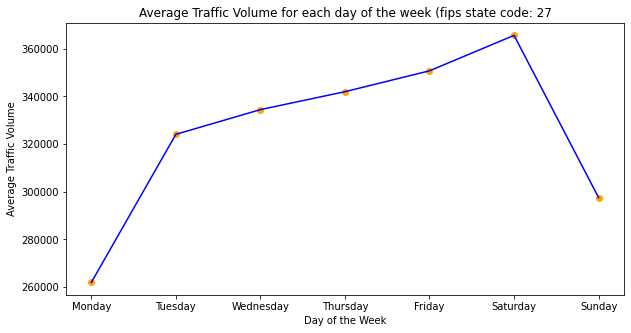

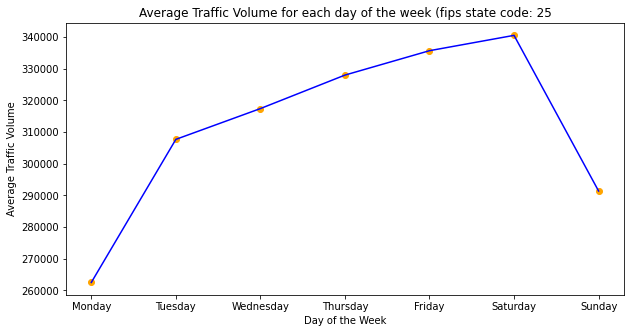

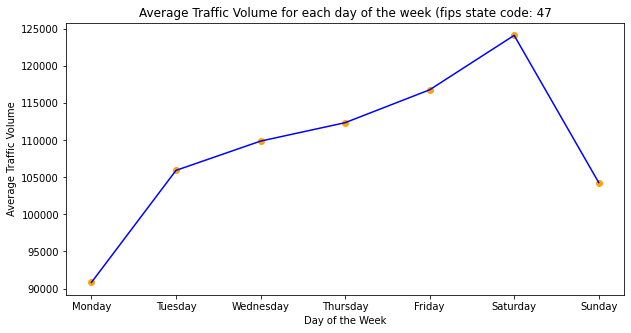

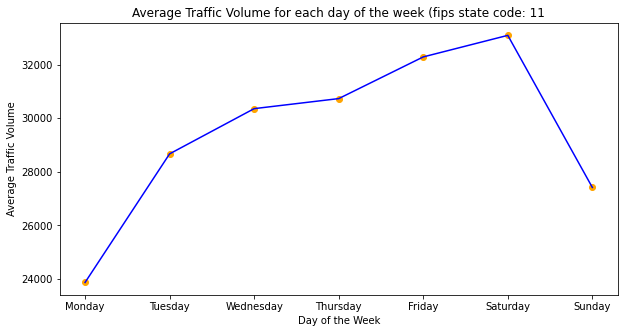

In [96]:
for i in range(len(fips_code)):
  plt.figure(figsize=(10,5))
  plt.plot(day_names, weekly_vol_bystate[i], color='blue')
  plt.scatter(day_names, weekly_vol_bystate[i], c='orange')
  plt.title(f'Average Traffic Volume for each day of the week (fips state code: {fips_code[i]}')
  plt.xlabel('Day of the Week')
  plt.ylabel('Average Traffic Volume')

### **Observations**

1. Although Mondays and Sundays have similar road traffic volume pattern at different periods of the day as discovered in the previous section, Sundays have more overall traffic volume as comapred to Mondays (on average)

2. Road traffic volume steadily rises from Tuesdays to Saturdays each week, with Saturday having the peak volume each week (on average)

3. On closer insepction, while most states follow the average, some states have a completely differently traffic volume pattern over the week such as West Virginia (54)

**Conclusion**
1. Traffic volumes does differ on different days of the week, weekly seasonality exists

## Day to Day Traffic Volume in 2015
Determine if there is any growth in traffic volume over time 

In [ ]:
# Obtain overall traffic volume for each data point by summing all the traffic volume bins in the row
avgdata_df['overall_volume'] = avgdata_df.iloc[:,start_index:].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Overall volume for the day, group dataframe by date and sum the overall volume values and put them to a list
ovr_volume = avgdata_df.groupby('date', as_index=False).sum().iloc[:,-1].to_list()

# Create a date index for the X-axis 
date_index = pd.to_datetime(avgdata_df.date.unique())

Text(0, 0.5, 'Overall Traffic Volume')

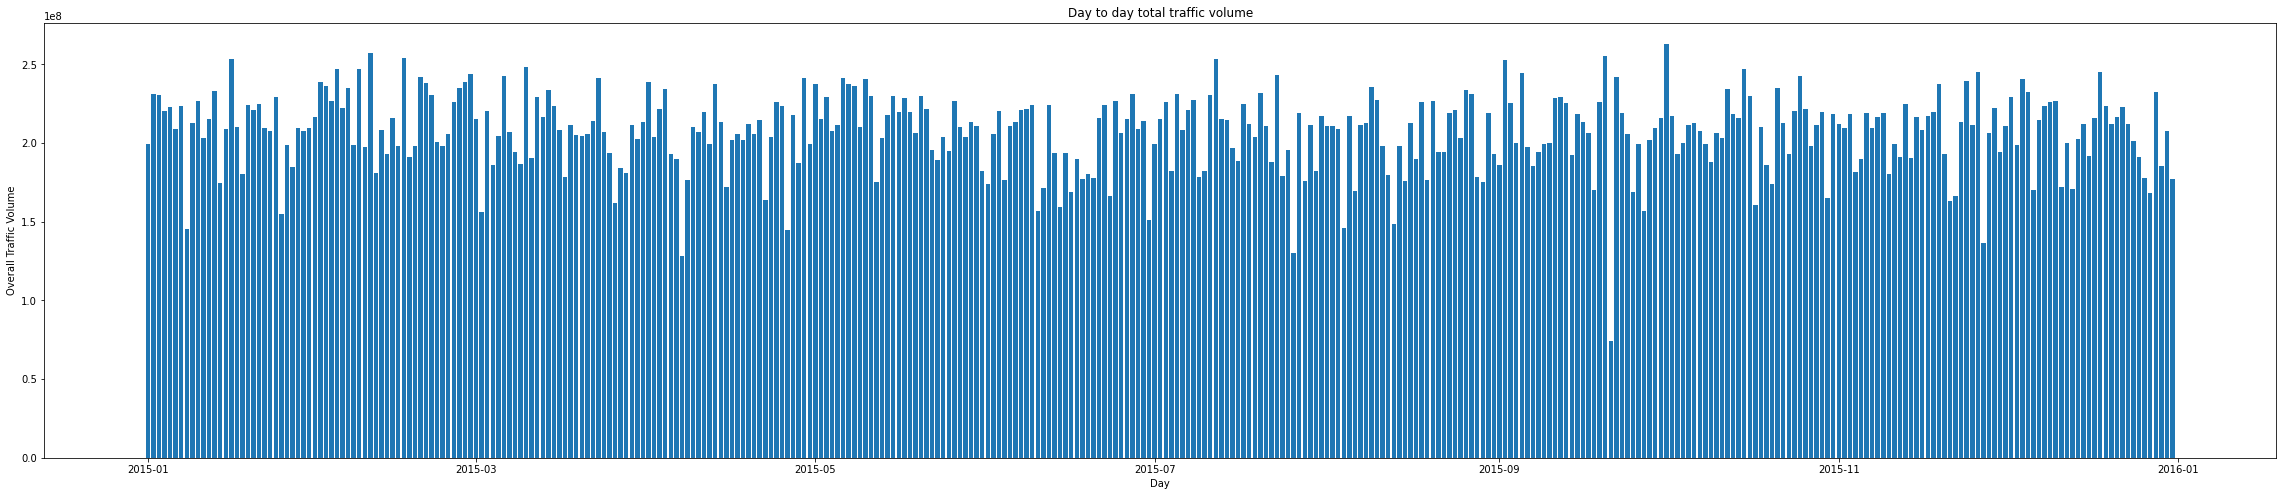

In [ ]:
# Plot the barchart with the variables defined in the previous cell
plt.figure(figsize=(40,8))
plt.bar(date_index, ovr_volume)
plt.title('Day to day total traffic volume')
plt.xlabel('Day')
plt.ylabel('Overall Traffic Volume')

### **Observation**

1. There is no trend to show that overall traffic volume is increasing througout 2015. 
2. Instead, there are periodic dips and spikes in traffic volume. This could be related to the weekly seasonality discovered in the previous section

## Highest and Lowest Traffic Volume days in 2015
Explore days with the highest and lowest traffic volume in dataset

In [26]:
# create new column with the overall traffic volume for the day
# Note: calculation might crash RAM if RAM is limited -- just run the first 2 cells under section "Introduction" and continue from here
traffic_df['overall_volume'] = traffic_df[list(traffic_df.columns[traffic_df.columns.get_loc("traffic_volume_counted_after_0000_to_0100"):traffic_df.columns.get_loc("traffic_volume_counted_after_2300_to_2400")+1])].sum(axis=1)

In [6]:
# set index so that plots below will show the proper dates
traffic_df.set_index('date', inplace=True)

**Highest Traffic Volume**

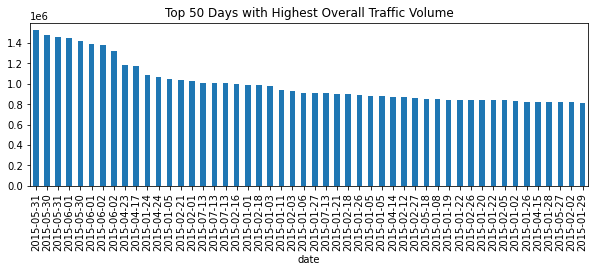

In [ ]:
# visualize the top 50 highest traffic days, here we see the top 10 is notably higher than the rest
traffic_df.nlargest(50,'overall_volume')['overall_volume'].plot(kind='bar', title='Top 50 Days with Highest Overall Traffic Volume' , figsize=(10,3))

In [ ]:
# Examining the top 20 largest traffic volume days in 2015
traffic_df.nlargest(10,'overall_volume')

,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data,overall_volume
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-05-31,31,1,1,North,36,5U,Urban: Collector,1,5,3,NaN,003480,74468,69198,58682,67364,70560,78159,76051,75116,65966,55394,1743,27454,75915,71345,75087,73173,56354,59671,68436,66778,69801,70319,61383,53962,15,1522379
2015-05-30,30,7,1,North,36,5U,Urban: Collector,1,5,3,NaN,003480,68579,61768,54405,62722,50184,52680,50828,62435,60506,64555,69278,63782,38668,72863,71711,76570,74776,55966,51732,55298,65958,61365,63495,66162,15,1476286
2015-05-31,31,1,5,South,36,5U,Urban: Collector,1,5,3,NaN,003480,71547,66790,56667,63126,66684,73984,72614,72596,63701,54049,1670,25791,71395,68306,72614,70669,54376,58087,64649,63090,66555,67364,59469,52082,15,1457875
2015-06-01,1,2,1,North,36,5U,Urban: Collector,1,6,3,NaN,003480,54322,33775,22918,44522,56990,54668,21277,55521,63866,70125,74381,62614,48793,54593,66138,71816,72214,76979,76133,78086,66705,77331,78278,62366,15,1444411
2015-05-30,30,7,5,South,36,5U,Urban: Collector,1,5,3,NaN,003480,66658,59443,52461,60698,47473,49516,49318,60522,58820,62085,66718,61890,36547,69722,69091,72955,71101,53500,49734,53144,63227,59630,61775,65099,15,1421127
2015-06-01,1,2,5,South,36,5U,Urban: Collector,1,6,3,NaN,003480,52507,31575,21576,42305,55014,52108,20223,52727,61481,67808,72106,60438,47052,53064,64122,70085,67622,71886,72425,74629,64346,75224,76122,60474,15,1386919
2015-06-02,2,3,1,North,36,5U,Urban: Collector,1,6,3,NaN,003480,64485,80741,77671,78618,66841,55273,59361,70237,71991,74492,60069,43471,44038,47595,47219,58587,54767,51564,51516,48405,43000,43574,42516,41905,15,1377936
2015-06-02,2,3,5,South,36,5U,Urban: Collector,1,6,3,NaN,003480,61786,76782,74804,75795,64437,53229,57477,66972,68878,71769,58030,41740,42332,46056,45870,56847,52618,49385,49273,46277,41465,42153,41126,40286,15,1325387
2015-04-23,23,5,3,East,5,1U,Urban: Principal Arterial - Interstate,2,4,3,NaN,600388,147,91,99,145,193,465,1071,58801,32600,95300,86400,88800,86000,86300,90300,94200,92100,88400,80200,60000,51800,36400,31500,23005,15,1184317


In [ ]:
# Bulk of highest traffic volume comes from the same station, getting more information on the station
stations_df.loc[stations_df['station_id'] == '003480']

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
8822,F,Axle spacing with Scheme F,NaN,NaN,13,0,NaN,5,South,75,36,5U,Urban: Collector,NaN,N,1,Outside (rightmost) lane,43.300598,76.152061,000010003204,6814.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,N,1,1,0,1,2,00000011,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,P,NaN,003480,1.0 MI N OF RT 49,L,Inductance loop,15,0,1
26555,F,Axle spacing with Scheme F,NaN,NaN,13,0,NaN,1,North,75,36,5U,Urban: Collector,NaN,N,1,Outside (rightmost) lane,43.300598,76.152061,000010003204,6814.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,N,1,1,0,1,2,00000011,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,P,NaN,003480,1.0 MI N OF RT 49,L,Inductance loop,15,0,1


In [7]:
# The top 1-10 are significantly higher so it might not be representative of the usual top traffic days, look into the top 11-20
traffic_df.nlargest(20,'overall_volume').tail(10)

,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data,overall_volume
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-24,24,7,5,South,39,1U,Urban: Principal Arterial - Interstate,2,1,3,NaN,000568,339,22,90017,90012,70011,16,10024,10039,80056,80062,30073,80087,70099,10097,50102,50103,50096,80081,30075,20063,40057,60059,10072,70048,15,1081710
2015-04-24,24,6,3,East,5,1U,Urban: Principal Arterial - Interstate,2,4,3,NaN,600388,175,113,99,138,186,440,1111,57901,22701,300,85200,86000,92700,88000,88300,94600,88600,82200,68300,63700,48200,37000,37400,27005,15,1070369
2015-01-05,5,2,5,South,39,1U,Urban: Principal Arterial - Interstate,2,1,3,NaN,000746,133,72,56,98,123,339,74,70148,139,60100,70092,90095,60101,40104,90112,30130,50166,195,90126,90076,70057,80044,90026,60021,15,1042627
2015-02-21,21,7,5,South,39,1U,Urban: Principal Arterial - Interstate,1,2,3,NaN,000729,339,22,90017,80019,40016,60025,50040,47,50063,90069,80,88,80090,80091,30080,30082,90089,50083,80078,30071,10050,20041,50044,30040,15,1041664
2015-02-01,1,1,3,East,39,2U,Urban: Principal Arterial - Other Freeways or ...,1,2,3,NaN,000557,339,20,16,40009,50008,70008,80012,90022,90037,40,50048,50053,50062,50067,66,70071,10067,40065,10055,70035,70035,70030,40042,30025,15,1031232
2015-07-13,13,2,1,North,54,1R,Rural: Principal Arterial - Interstate,1,7,3,NaN,000050,260,235,227,236,283,457,635,785,857,818,882,917,1003,1033,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,15,1008618
2015-07-13,13,2,1,North,54,1R,Rural: Principal Arterial - Interstate,2,7,3,NaN,000050,99,85,76,69,104,243,453,698,773,686,751,783,855,829,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,15,1006494
2015-07-13,13,2,5,South,54,1R,Rural: Principal Arterial - Interstate,2,7,3,NaN,000050,82,70,49,59,104,277,453,628,670,693,788,774,857,895,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,15,1006389
2015-02-16,16,2,7,West,39,1U,Urban: Principal Arterial - Interstate,2,2,3,NaN,000582,156,89,65,87,149,339,59,60078,90077,70084,90083,90088,94,40099,70107,121,80132,60122,20099,80070,80062,60051,40038,70026,15,1002375


In [42]:
# Determine the number of rows that each function road classification have an overall volume above the 0.9 quartile
traffic_df['functional_classification_name'].loc[traffic_df['overall_volume'] > traffic_df['overall_volume'].quantile(.9)].value_counts(normalize=True)

Urban: Principal Arterial - Interstate                       0.601625
Urban: Principal Arterial - Other Freeways or Expressways    0.206379
Rural: Principal Arterial - Interstate                       0.124251
Urban: Principal Arterial - Other                            0.042576
Rural: Principal Arterial - Other                            0.018458
Rural: Minor Arterial                                        0.003931
Urban: Minor Arterial                                        0.002399
Rural: Major Collector                                       0.000363
Urban: Collector                                             0.000015
Urban: Local System                                          0.000003
Name: functional_classification_name, dtype: float64

### **Observations 1**

For the Highest Traffic Volume days, 

1. Among the top 50 days with highest overall traffic volume, the top 10 is significantly higher than the rest
2. On further analysis, dates for the high traffic volume in New York ranges from 2015-05-30 to 2015-06-02, with traffic from with direction of travel being North and South, this probably suggets that many were heading in the same direction (for an event/ work in the city) and heading back after
3. Based on the above 2 reasons, it can be concluded that this traffic volume is uncommon and caused by an external factor.

Considering that the Top 10 highest traffic days is an uncommon event and not representative of high traffic days as detailed above, we further look into the top 11-20 and the functional classification of roads that have the top 10% of overall volume. Here we make the following observations,
1. Principal Arterial Roads, especially those that run interstate have the high traffic volume 
2. Principal Arterial Roads in Ohio (39 fips state code) has some of the highest traffic volumes in the year, the days that it records its highest traffic volumes are spread out and station_ids are not repeated

**Lowest Traffic Volume**

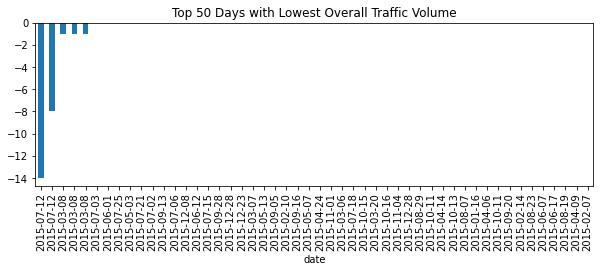

In [ ]:
traffic_df.nsmallest(50,'overall_volume')['overall_volume'].plot(kind='bar', title='Top 50 Days with Lowest Overall Traffic Volume' , figsize=(10,3))

In [ ]:
# Finding the top 10 lowest traffic volume days in 2015
traffic_df.nsmallest(10,'overall_volume')

,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data,overall_volume
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-12,12,1,7,West,51,4R,Rural: Minor Arterial,0,7,3,NaN,050031,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,15,-14
2015-07-12,12,1,3,East,51,4R,Rural: Minor Arterial,0,7,3,NaN,050031,15,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,15,-8
2015-03-08,8,1,5,South,51,1U,Urban: Principal Arterial - Interstate,0,3,3,NaN,199741,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,-1
2015-03-08,8,1,5,South,51,1U,Urban: Principal Arterial - Interstate,0,3,3,NaN,199760,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,-1
2015-03-08,8,1,5,South,51,1U,Urban: Principal Arterial - Interstate,0,3,3,NaN,199750,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,-1
2015-07-03,3,6,1,North,21,3R,Rural: Principal Arterial - Other,1,7,3,NaN,057P65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0
2015-06-01,1,2,5,South,36,1U,Urban: Principal Arterial - Interstate,1,6,3,NaN,000599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0
2015-07-25,25,7,3,East,44,2U,Urban: Principal Arterial - Other Freeways or ...,2,7,3,NaN,280284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0
2015-05-03,3,1,1,North,51,1R,Rural: Principal Arterial - Interstate,0,5,3,NaN,787051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0


In [ ]:
# Interesting to note that there is an almost 50/50 mix of rural and urban roads for the lowest traffic day, possibility that this is due to an imbalanced dataset with more Urban data points
# Check if the dataset is imbalanced towards urban areas, by calculating the percentage of dataset that is Urban vs Rural
rural_perc = 0
urban_perc = 0
for index, value in traffic_df['functional_classification_name'].value_counts(normalize=True).items():
  if 'Urban' in index:
    urban_perc += value
  if 'Rural' in index:
    rural_perc += value

print(f'Percentage of rows for Urban: {round(urban_perc*100,2)}%, Percentage of rows for Rural: {round(rural_perc*100,2)}%')

Percentage of rows for Urban: 54.47%, Percentage of rows for Rural: 45.53%


In [ ]:
# Number of data points with traffic 0 or less
traffic_df['overall_volume'].loc[traffic_df['overall_volume'] <= 0].count()

24307

In [32]:
# Count the number of Urban/Rural roads with traffic 0 or less
urban_low = 0
rural_low = 0

# Get the list of functional classification names with an overall volume of 0 or less and loop through it
for fclass in traffic_df['functional_classification_name'].loc[traffic_df['overall_volume'] <= 0].to_list():
  if 'Urban' in fclass:
    urban_low += 1
  if 'Rural' in fclass:
    rural_low += 1

# Get total entries
total = urban_low+rural_low
    
print(f'Percentage of rows for Urban: {round(urban_low/total*100,2)}%, Percentage of rows for Rural: {round(rural_low/total*100,2)}%')

Percentage of rows for Urban: 59.9%, Percentage of rows for Rural: 40.1%


In [41]:
# Get the number of days that each function road classification have an overall volume of 0 or less
traffic_df['functional_classification_name'].loc[traffic_df['overall_volume'] <= 0].value_counts(normalize=True)

Urban: Principal Arterial - Interstate                       0.366067
Rural: Principal Arterial - Other                            0.191344
Urban: Principal Arterial - Other Freeways or Expressways    0.154277
Rural: Principal Arterial - Interstate                       0.128687
Urban: Principal Arterial - Other                            0.059695
Rural: Minor Arterial                                        0.051302
Rural: Major Collector                                       0.019747
Urban: Minor Arterial                                        0.012219
Rural: Minor Collector                                       0.009915
Urban: Local System                                          0.005019
Urban: Collector                                             0.001728
Name: functional_classification_name, dtype: float64

In [40]:
# Determine the percentage of dataset that consists of each functional classification
traffic_df['functional_classification_name'].value_counts(normalize=True)

Urban: Principal Arterial - Interstate                       0.238401
Rural: Principal Arterial - Other                            0.195185
Urban: Principal Arterial - Other                            0.155930
Rural: Principal Arterial - Interstate                       0.140842
Urban: Principal Arterial - Other Freeways or Expressways    0.093601
Rural: Minor Arterial                                        0.068249
Rural: Major Collector                                       0.044701
Urban: Minor Arterial                                        0.044122
Urban: Collector                                             0.011196
Rural: Minor Collector                                       0.005195
Urban: Local System                                          0.001497
Rural: Local System                                          0.001081
Name: functional_classification_name, dtype: float64

In [43]:
# Determine the number of rows that each function road classification have an overall volume above the 0.9 quartile
traffic_df['functional_classification_name'].loc[traffic_df['overall_volume'] > traffic_df['overall_volume'].quantile(.1)].value_counts(normalize=True)

Urban: Principal Arterial - Interstate                       0.260815
Rural: Principal Arterial - Other                            0.182295
Urban: Principal Arterial - Other                            0.167747
Rural: Principal Arterial - Interstate                       0.143899
Urban: Principal Arterial - Other Freeways or Expressways    0.101935
Rural: Minor Arterial                                        0.054651
Urban: Minor Arterial                                        0.046992
Rural: Major Collector                                       0.027385
Urban: Collector                                             0.010680
Rural: Minor Collector                                       0.002290
Urban: Local System                                          0.000944
Rural: Local System                                          0.000367
Name: functional_classification_name, dtype: float64

In [ ]:
# reset the index done at the start of this section
traffic_df.reset_index('date', inplace=True)

### **Observations 2**

For the lowest traffic volume days,
1. Although roads classified as Rural should account for the lowest traffic volumes, there is a higher percentage of days that urban roads have a traffic volume of 0 or less. This is not due to an imbalanced dataset skewed towards Urban data points, the dataset is 55/45 for urban and rural area respectively.
2. For days that have a negative traffic volume, it is probably due to an error. To assume that it is wrong and drop these rows (in Part 3)
3. Considering that Urban: Principal Arterial accounts of most of the highest and lowest traffic volume days, there is a possibility that these type of roads are used heavily when they are used or not at all. Although this could be because 38% of the dataset is Urban: Principal Arterial, its occurance in the lowest and highest traffic volume is disproportionate, therefore this should be looked into for road planning.

# Part 3: Predicting Traffic Volume
In this section, we aim to develop a random forest model to predict near term traffic flow to provide insights for traffic management.

**Why Random Forest?**

Random forest is a flexible algorithm that generally produces good results  even without hyper-parameter tuning. 

Random forest is chosen for this problem because of its suits the dataset

1. Reduces overfitting, helping to improve accuracy in production scenario
2. It works well with both categorical and continuous values -- which is what the dataset has, thus it is suitable for the data we have
3. Does not require data normailisation 
4. Data follows a non-linear trend, random forest is suitable
5. Extrapolation outside the training data is not very important, as we saw in _Part 2: Understanding Traffic Volume > Day to Day Traffic Volume in 2015_, traffic volume does not show an increasing trend. Random forest is suitable for this case, at least in the short run.



In [8]:
# Uncomment and start here if Notebook crashes from RAM issue
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Change file path accoringly
traffic_path = '/content/drive/MyDrive/Colab Notebooks/ocbc hack-it/dot_traffic_2015.txt.gz'
stations_path = '/content/drive/MyDrive/Colab Notebooks/ocbc hack-it/dot_traffic_stations_2015.txt.gz'

# Read in files as dataframes
traffic_df = pd.read_csv(traffic_path, compression='gzip', header=0, sep=',', quotechar='"')
stations_df = pd.read_csv(stations_path, compression='gzip', header=0, sep=',', quotechar='"')

In [9]:
traffic_df['date'] = pd.to_datetime(traffic_df['date'], format='%Y-%m-%d')

## Data Preprocessing and Feature Engineering

**Dropping redundant columns**

1. "restriction" because of missing values
2. "record_type" and "year_of_data" because of same values
3. "direction_of_travel_name" is the name for attribute "direction_of_travel", it is a repeat and is not relevant for our random forest
4. "functional classification" is the label for "functional_classification_name". As this attribute is an object and we have to encode it anyway, we drop this attribute in favour of encoding "functional_classification_name"
5. "day_of_week" to be dropped in favour of a new column that identifies Mondays and Sundays to have traffic volume lower than the rest of the week.
- Note: columns are dropped separately in two different cells in this section

**New Features**
1. Holidays: on the assumption that federal holidays impact the traffic volume
2. Monday and Sunday: identifies data points that are on Mondays/Sundays as they generally have lower average traffic volume

In [10]:
# as mentioned in Section Part 1: Undestanding DataFrame, we will drop these columns first
traffic_df.drop(['restrictions', 'record_type','year_of_data'], axis=1, inplace=True)

In [11]:
# Add holidays as a feature, on the assumption that holidays impact the traffic volume 
# data for federal holidays taken from https://www.officeholidays.com/countries/usa/2015 
fedholiday_dates = pd.to_datetime(['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-26', '2015-12-25'], format='%Y-%m-%d')

# Check if current date is a federal holiday date and convert the list of booleans to integers to create a new column
# Column value of 1 if the date falls on a holiday, otherwise 0
traffic_df['holiday'] = traffic_df['date'].isin(fedholiday_dates).astype(int)

In [12]:
# Add column to separate Monday and Sunday 
monsun_days = [1,7]

# Check if current day of week is a Monday/Sunday and convert the list of booleans to integers to create a new column (1 for Monday and Sundays, 0 for the rest of the days of the week)
traffic_df['mon/sun'] = traffic_df['day_of_week'].isin(monsun_days).astype(int)

In [13]:
# If overall volume has not been run above, run this cell
traffic_df['overall_volume'] = traffic_df[list(traffic_df.columns[traffic_df.columns.get_loc("traffic_volume_counted_after_0000_to_0100"):traffic_df.columns.get_loc("traffic_volume_counted_after_2300_to_2400")+1])].sum(axis=1)

In [14]:
# Drop rows with negative traffic volume (mentioned in Section Part 2: Understanding Traffic Volume > Highest and Lowest Traffic Volume)

# Locate the index for rows with overall volume less than 0 and drop them
traffic_df.drop(traffic_df.index[traffic_df['overall_volume'] < 0], inplace=True)

**Encoding Categorical Variables** 

- direction of travel name is already represneted by direction of travel as in integer datatype, will proceed to drop direction of travel.
- functional_classification and functional_classification_name attribute are objects, we will drop functional_classification and label encode functional_classification_name
- label encode station_id
- there is too many unique values to consider one hot encoding of the object

**To encode**: functional_classification_name, station_id

**To drop**: direction_of_travel_name, functional_classification



In [15]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140386 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   date                                       datetime64[ns]
 1   day_of_data                                int64         
 2   day_of_week                                int64         
 3   direction_of_travel                        int64         
 4   direction_of_travel_name                   object        
 5   fips_state_code                            int64         
 6   functional_classification                  object        
 7   functional_classification_name             object        
 8   lane_of_travel                             int64         
 9   month_of_data                              int64         
 10  station_id                                 object        
 11  traffic_volume_counted_after_0000_to_0100  int64         
 12  

In [16]:
# Drop columns mentioned above
traffic_df.drop(['direction_of_travel_name', 'functional_classification', 'day_of_week'], axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

# List of variables to encode
categ = ['functional_classification_name','station_id']

# Define label encoder
le = LabelEncoder()

# Encode
traffic_df[categ] = traffic_df[categ].apply(le.fit_transform)

## EDA

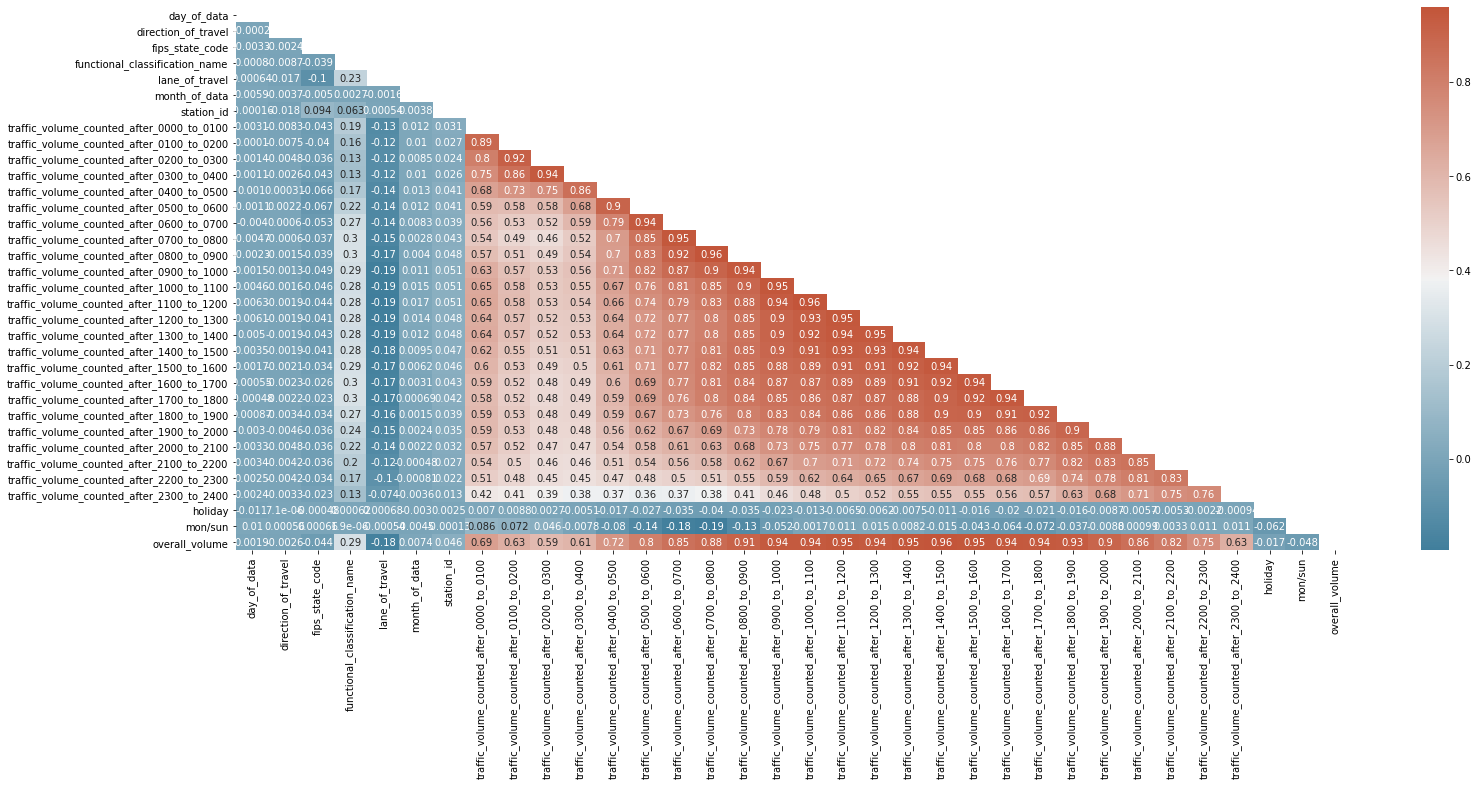

In [18]:
# Get correlation 
corr = traffic_df.corr()

# Set plot configuration
f, ax = plt.subplots(figsize=(25, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Remove corr variable from memory
del corr

**Observation**

1. Traffic for a specific time period is highly correlated to the hours before, which makes sense.
2. Overall traffic is most correlated to traffic during the day

## Training 
- did not manage to train the model due to limited time
- code is working

In [ ]:
y = traffic_df.pop('overall_volume')

In [ ]:
from sklearn.model_selection import train_test_split

# Do a train test split with 80% of data to train and 20% to test. exclude the 1st date column
X_train,X_test,y_train,y_test = train_test_split(traffic_df.iloc[:,1:],y,test_size=0.2)

In [ ]:
# Take a look at shape of train and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5712308, 35) (5712308,)
(1428078, 35) (1428078,)


In [ ]:
# RANDOM FOREST
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

In [ ]:
# Get feature importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Make predictions on test data
y_pred = rf.predict(x_test)
y_pred

In [ ]:
# Evaluate model performance
from sklearn.metrics import r2_score,mean_squared_error

# Obtain RMSE, the lower the RMSE the better the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

**Future Works**
1. Hyper parameter tuning for random forest to improve performance
2. Bagging and Boosting to further improve random forest performance
3. Include stations dataset as part of analysis 